<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/MeenakshiPoorani/formula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Shared drives/Projects/Clicked/F1'

# Hypothesis:
By analyzing the historical performance data of Formula 1 teams, we can identify key factors that contribute to good performance and recommend specific strategies for the worst-performing team to improve their race results.

Factors such as pit stop, qaulify times, grid position

# Initial Data Exploration:
Heatmap to show correlation

Aggregating pit stop times

Ranking of Teams with quickest pit stops

Ranking of Teams lowest grid position

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import fastf1
import seaborn as sns
import fastf1.plotting
from fastf1.core import Laps
from timple.timedelta import strftimedelta
import plotly.express as px



In [1]:
pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.8 MB/s eta 0:00:00


Read files

In [5]:
results = pd.read_csv('/content/formula1/results.csv')
races=pd.read_csv('/content/formula1/races.csv')
drivers=pd.read_csv('/content/formula1/drivers.csv')
constructors=pd.read_csv('/content/formula1/constructors.csv')
constructor_standings=pd.read_csv('/content/formula1/constructor_standings.csv')
status=pd.read_csv('/content/formula1/status.csv')
driver_standings=pd.read_csv('/content/formula1/driver_standings.csv')
pit_stops=pd.read_csv('/content/formula1/pit_stops.csv')
qualifying=pd.read_csv('/content/formula1/qualifying.csv')
constructor_results=pd.read_csv('/content/formula1/constructor_results.csv')
lap_times=pd.read_csv('/content/formula1/lap_times.csv')

In [ ]:
driver_standings.info()
driver_standings.head(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34124 non-null  int64  
 1   raceId             34124 non-null  int64  
 2   driverId           34124 non-null  int64  
 3   points             34124 non-null  float64
 4   position           34124 non-null  int64  
 5   positionText       34124 non-null  object 
 6   wins               34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


,0,1,2,3,4
driverStandingsId,1,2,3,4,5
raceId,18,18,18,18,18
driverId,1,2,3,4,5
points,10.0,8.0,6.0,5.0,4.0
position,1,2,3,4,5
positionText,1,2,3,4,5
wins,1,0,0,0,0


In [4]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:

driver_standings.describe()

,driverStandingsId,raceId,driverId,points,position,wins
count,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000
mean,42535.650656,572.649396,307.284697,13.489987,19.897169,0.269429
std,21729.601277,284.154765,267.228677,35.599709,16.396017,0.995681
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19649.750000,347.000000,85.000000,0.000000,8.000000,0.000000
50%,49674.500000,595.000000,221.000000,1.000000,16.000000,0.000000
75%,58946.250000,797.000000,509.000000,10.000000,26.000000,0.000000
max,72187.000000,1110.000000,858.000000,454.000000,108.000000,15.000000


In [ ]:
constructors.describe()

,constructorId
count,211.000000
mean,107.037915
std,61.653629
min,1.000000
25%,54.500000
50%,107.000000
75%,159.500000
max,214.000000


In [ ]:
constructors.info()
constructors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [ ]:
pit_stops.info()
pit_stops.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [ ]:
# prompt: top 5 drivers performance


# Group the results by driver and calculate the sum of points
driver_points = results.groupby('driverId')['points'].sum()

# Sort the drivers by points in descending order
sorted_drivers = driver_points.sort_values(ascending=False)

# Print the top 5 drivers and their points
print(sorted_drivers.head(5))


driverId
1      4540.5
20     3098.0
830    2275.5
4      2203.0
8      1873.0
Name: points, dtype: float64


## Merging the Data

In [6]:
df = pd.merge(results,races[['raceId','year','name','round','date']],on = 'raceId',how = 'left')
df=pd.merge(df,drivers[['driverId','driverRef','forename','surname','nationality','dob']],on='driverId',how='left')
df=pd.merge(df,constructors[['constructorId','name','nationality']],on='constructorId',how='left')
df=pd.merge(df,status[['statusId','status']],on='statusId',how='left')
pd.get_option("display.max_columns",None)
print("\nMerged DataFrame:")
print(df.head())
df


Merged DataFrame:
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  ...  round        date   driverRef  \
0            1              1    10.0  ...      1  2008-03-16    hamilton   
1            2              2     8.0  ...      1  2008-03-16    heidfeld   
2            3              3     6.0  ...      1  2008-03-16     rosberg   
3            4              4     5.0  ...      1  2008-03-16      alonso   
4            5              5     4.0  ...      1  2008-03-16  kovalainen   

   forename     surname nationality_x         dob      name_y  nationality_y  \
0     Lewis    Ha

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,round,date,driverRef,forename,surname,nationality_x,dob,name_y,nationality_y,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07,McLaren,British,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10,BMW Sauber,German,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27,Williams,British,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29,Renault,French,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19,McLaren,British,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,AlphaTauri,Italian,Finished
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31,Williams,British,Finished
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19,Haas F1 Team,American,Finished
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01,Ferrari,Italian,Collision damage


## Cleaning the Data

In [6]:
# @title
# Check for duplicates
duplicates = df.duplicated()
print(f'\nDuplicates in the merged dataframe: {duplicates.sum()}')

# Drop duplicates if any
df = df.drop_duplicates()

# Check for missing values in the merged dataframe
missing_values_merged = df.isnull().sum()
print("\nMissing Values in Merged DataFrame:")
print(missing_values_merged[missing_values_merged > 0])

# Handle missing values (Example: Fill missing values with mean for numerical columns)
#df = df.fillna(df.mean())


Duplicates in the merged dataframe: 0

Missing Values in Merged DataFrame:
Series([], dtype: int64)


In [ ]:
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,round,date,driverRef,forename,surname,nationality_x,dob,name_y,nationality_y,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07,McLaren,British,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10,BMW Sauber,German,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27,Williams,British,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29,Renault,French,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19,McLaren,British,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,AlphaTauri,Italian,Finished
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31,Williams,British,Finished
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19,Haas F1 Team,American,Finished
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01,Ferrari,Italian,Collision damage


Driver Name

In [ ]:
df['driverName']=df['forename']+ ' '+ df['surname']
df.drop(['forename','surname'],axis=1,inplace=True)

Top drivers in 2023

In [ ]:


# Filter data for 2023
df_2023 = df[df['year'] == 2023]


# Group by driver and sum points
driver_points_2023 = df_2023.groupby('driverRef')['points'].sum()

# Sort by points in descending order
sorted_drivers_2023 = driver_points_2023.sort_values(ascending=False)

# Print the top 5 drivers and their points
print(sorted_drivers_2023.head(10))


driverRef
max_verstappen    292.0
perez             174.0
hamilton          144.0
alonso            142.0
russell            92.0
leclerc            88.0
sainz              77.0
norris             66.0
stroll             41.0
ocon               33.0
Name: points, dtype: float64


In [ ]:
# prompt: remove column driver_name

df.drop(columns=["driver_name"], inplace=True)


In [ ]:
df_2023.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,date,driverRef,forename,surname,nationality_x,dob,name_y,nationality_y,status,driverName
25840,25846,1098,830,9,1,1,1,1,1,25.0,...,2023-03-05,max_verstappen,Max,Verstappen,Dutch,1997-09-30,Red Bull,Austrian,Finished,Max Verstappen
25841,25847,1098,815,9,11,2,2,2,2,18.0,...,2023-03-05,perez,Sergio,Pérez,Mexican,1990-01-26,Red Bull,Austrian,Finished,Sergio Pérez
25842,25848,1098,4,117,14,5,3,3,3,15.0,...,2023-03-05,alonso,Fernando,Alonso,Spanish,1981-07-29,Aston Martin,British,Finished,Fernando Alonso
25843,25849,1098,832,6,55,4,4,4,4,12.0,...,2023-03-05,sainz,Carlos,Sainz,Spanish,1994-09-01,Ferrari,Italian,Finished,Carlos Sainz
25844,25850,1098,1,131,44,7,5,5,5,10.0,...,2023-03-05,hamilton,Lewis,Hamilton,British,1985-01-07,Mercedes,German,Finished,Lewis Hamilton


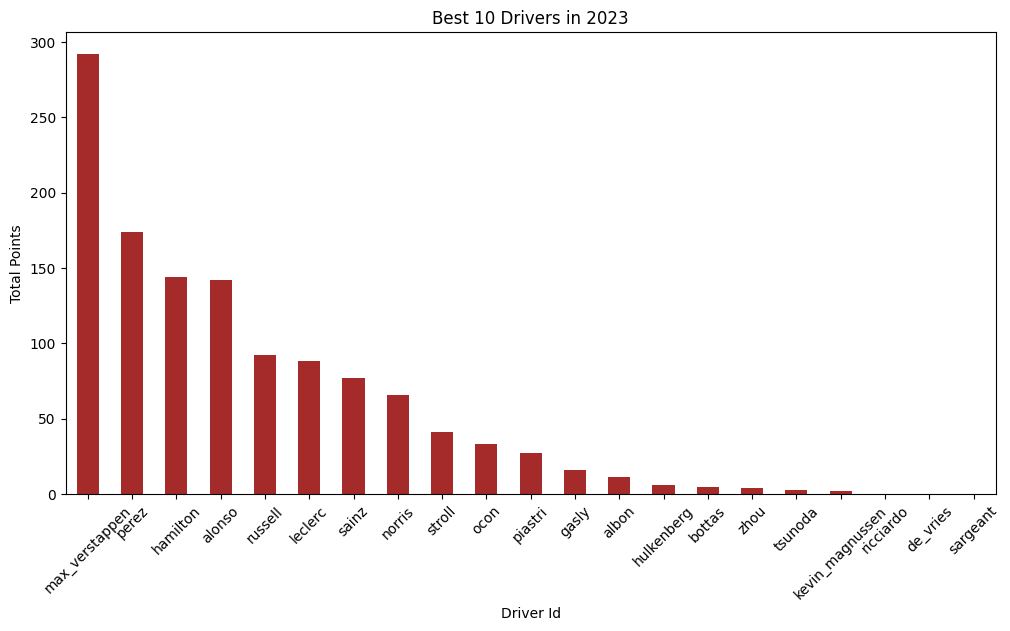

In [ ]:
plt.figure(figsize=(12, 6))
sorted_drivers_2023.plot(kind='bar', color='brown')
plt.xlabel('Driver Id')
plt.ylabel('Total Points')
plt.title('Best 10 Drivers in 2023')
plt.xticks(rotation=45)
plt.show()

Top 10 overall driver performance

In [13]:
drivers=drivers[['driverId','driverRef']]
top_drivers = pd.merge(driver_standings, drivers, on='driverId')
top_drivers = top_drivers.groupby(['driverId','driverRef'])['points'].sum()
top_drivers = top_drivers.sort_values(ascending=False).head(10)

In [14]:
print(top_drivers)

driverId  driverRef         
1         hamilton              46550.5
20        vettel                32026.0
830       max_verstappen        22486.5
4         alonso                21692.0
822       bottas                19458.0
8         raikkonen             19069.0
3         rosberg               16910.0
30        michael_schumacher    14514.0
815       perez                 13756.0
817       ricciardo             13626.0
Name: points, dtype: float64


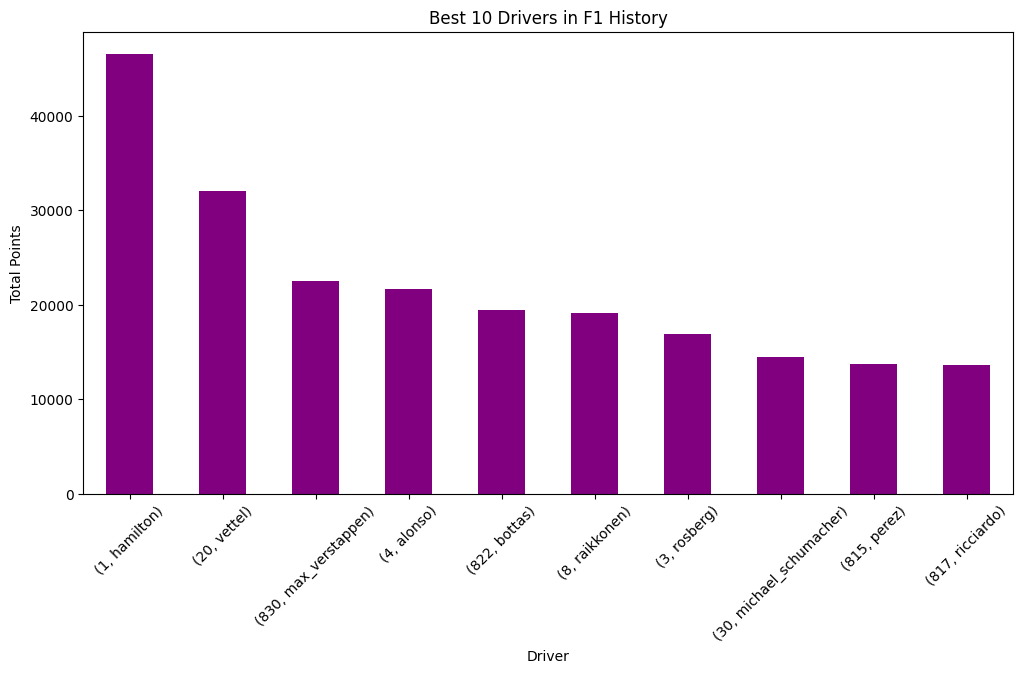

In [15]:
plt.figure(figsize=(12, 6))
top_drivers.plot(kind='bar', color='purple')
plt.xlabel('Driver')
plt.ylabel('Total Points')
plt.title('Best 10 Drivers in F1 History')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(drivers.head())
print(drivers.info())

   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------

drivers position

In [ ]:
merged_data = pd.merge(races, results, on='raceId')
merged_data = pd.merge(merged_data, drivers, on='driverId')

# Calculate average race position for each driver
driver_avg_position = merged_data.groupby('driverRef')['positionOrder'].mean().reset_index()

print(driver_avg_position)

     driverRef  positionOrder
0       Cannoc      14.000000
1       Changy      19.000000
2        abate      26.500000
3    abecassis      17.000000
4      acheson      24.777778
..         ...            ...
852     zapico      27.000000
853       zhou      14.176471
854      zonta      13.394737
855      zorzi      15.428571
856     zunino      15.272727

[857 rows x 2 columns]


 Average Grid Position

In [ ]:
grid_column=results['grid']
drivers['grid']=grid_column

position_column=results['position']
drivers['position']=position_column

In [ ]:
drivers['Average_Grid_Position'] = drivers['grid'].mean()


In [ ]:
# Convert 'position' column to numeric, excluding non-numeric values
drivers['position'] = pd.to_numeric(drivers['position'], errors='coerce')

# Calculate the mean of the 'position' column, excluding NaN values
drivers['Average_Race_Position'] = drivers['position'].mean(skipna=True)

drivers['Average_Race_Position'] = drivers['position'].mean()

In [ ]:
drivers['Average_Race_Position']

0      8.686244
1      8.686244
2      8.686244
3      8.686244
4      8.686244
         ...   
852    8.686244
853    8.686244
854    8.686244
855    8.686244
856    8.686244
Name: Average_Race_Position, Length: 857, dtype: float64

In [ ]:
drivers['Average_Grid_Position']

0      11.128355
1      11.128355
2      11.128355
3      11.128355
4      11.128355
         ...    
852    11.128355
853    11.128355
854    11.128355
855    11.128355
856    11.128355
Name: Average_Grid_Position, Length: 857, dtype: float64

In [ ]:
# Group by average race position and calculate average grid position for each group
grouped = drivers.groupby('Average_Race_Position')['Average_Grid_Position'].mean()

print(grouped)

Average_Race_Position
8.686244    11.128355
Name: Average_Grid_Position, dtype: float64


In [ ]:
drivers


,driverId,driverRef,number,code,forename,surname,dob,nationality,url,grid,position,Average_Grid_Position,Average_Race_Position
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,1.0,11.128355,8.686244
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,5,2.0,11.128355,8.686244
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,7,3.0,11.128355,8.686244
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,11,4.0,11.128355,8.686244
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,3,5.0,11.128355,8.686244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,1,1.0,11.128355,8.686244
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu,3,2.0,11.128355,8.686244
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,2,3.0,11.128355,8.686244
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,4,4.0,11.128355,8.686244


## Average lap times trend

In [ ]:
merged_data = pd.merge(races, lap_times, on='raceId')
merged_data = pd.merge(merged_data, drivers, on='driverId')
average_lap_time_by_race = merged_data.groupby(['year', 'raceId'])['milliseconds'].mean().reset_index()
average_lap_time_by_race


,year,raceId,milliseconds
0,1996,224,99021.050493
1,1996,225,96868.486388
2,1996,226,98446.646057
3,1996,227,85186.728507
4,1996,228,93190.647510
...,...,...,...
505,2023,1106,81506.546768
506,2023,1107,73293.628973
507,2023,1108,98705.386598
508,2023,1109,85491.864217


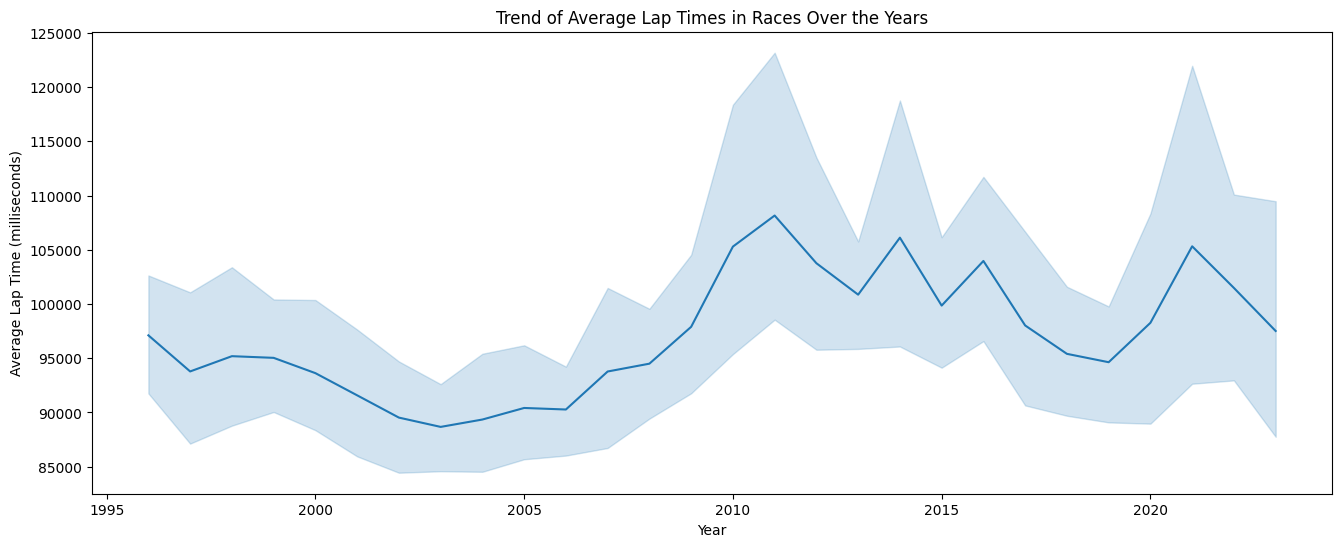

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='year', y='milliseconds', data=average_lap_time_by_race)
plt.xlabel('Year')
plt.ylabel('Average Lap Time (milliseconds)')
plt.title('Trend of Average Lap Times in Races Over the Years')
plt.show()

Top drivers laptimes

In [ ]:
top_drivers

driverId  driverRef         
1         hamilton              46550.5
20        vettel                32026.0
830       max_verstappen        22486.5
4         alonso                21692.0
822       bottas                19458.0
8         raikkonen             19069.0
3         rosberg               16910.0
30        michael_schumacher    14514.0
815       perez                 13756.0
817       ricciardo             13626.0
Name: points, dtype: float64

In [ ]:
top_drivers,average_lap_time_by_race.describe

(driverId  driverRef         
 1         hamilton              46550.5
 20        vettel                32026.0
 830       max_verstappen        22486.5
 4         alonso                21692.0
 822       bottas                19458.0
 8         raikkonen             19069.0
 3         rosberg               16910.0
 30        michael_schumacher    14514.0
 815       perez                 13756.0
 817       ricciardo             13626.0
 Name: points, dtype: float64,
 <bound method NDFrame.describe of      year  raceId   milliseconds
 0    1996     224   99021.050493
 1    1996     225   96868.486388
 2    1996     226   98446.646057
 3    1996     227   85186.728507
 4    1996     228   93190.647510
 ..    ...     ...            ...
 505  2023    1106   81506.546768
 506  2023    1107   73293.628973
 507  2023    1108   98705.386598
 508  2023    1109   85491.864217
 509  2023    1110  114249.220859
 
 [510 rows x 3 columns]>)

Average lap times by race

In [ ]:
merged_data = pd.merge(races, lap_times, on='raceId')
merged_data = pd.merge(merged_data, drivers, on='driverId')
average_lap_time_by_race = merged_data.groupby(['driverId', 'raceId'])['milliseconds'].mean().reset_index()
average_lap_time_by_race

,driverId,raceId,milliseconds
0,1,1,97563.758621
1,1,2,109398.548387
2,1,3,127416.982143
3,1,4,97022.421053
4,1,5,89849.476923
...,...,...,...
10379,858,1106,81678.666667
10380,858,1107,73571.300000
10381,858,1108,98857.115385
10382,858,1109,86406.328358


In [ ]:
top_drivers_laptime = pd.merge(top_drivers, average_lap_time_by_race, on='driverId',how='left')
top_drivers_laptime.head(10)

,driverId,points,raceId,milliseconds
0,1,46550.5,1,97563.758621
1,1,46550.5,2,109398.548387
2,1,46550.5,3,127416.982143
3,1,46550.5,4,97022.421053
4,1,46550.5,5,89849.476923
5,1,46550.5,6,79050.415584
6,1,46550.5,7,90781.068966
7,1,46550.5,8,85293.593220
8,1,46550.5,9,99783.593220
9,1,46550.5,10,84341.085714


In [ ]:
top_drivers_laptime_sorted = top_drivers_laptime.sort_values(by=['points', 'raceId', 'milliseconds'], ascending=False)
top_drivers_laptime_sorted

,driverId,points,raceId,milliseconds
316,1,46550.5,1110,113639.113636
315,1,46550.5,1109,84682.400000
314,1,46550.5,1108,98533.096154
313,1,46550.5,1107,72856.380282
312,1,46550.5,1106,80750.228571
...,...,...,...,...
2368,817,13626.0,853,126397.487179
2367,817,13626.0,852,123046.076923
2366,817,13626.0,851,97841.378788
2365,817,13626.0,850,103652.350877


Best Teams overall

In [ ]:
the_best_teams=constructors.merge(results,on = 'constructorId',how = 'left')
the_best_teams = the_best_teams[['name','points','raceId']]
the_best_teams = the_best_teams.groupby('name')['raceId'].nunique().sort_values(ascending = False).reset_index(name = 'races')
the_best_teams = the_best_teams[the_best_teams['races'] >= 100]
the_best_teams

,name,races
0,Ferrari,1066
1,McLaren,895
2,Williams,809
3,Tyrrell,433
4,Renault,403
5,Team Lotus,395
6,Sauber,395
7,Red Bull,360
8,Minardi,345
9,Ligier,330


<ipython-input-14-d9f237248d43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='races', y='name', data=the_best_teams, palette='viridis')


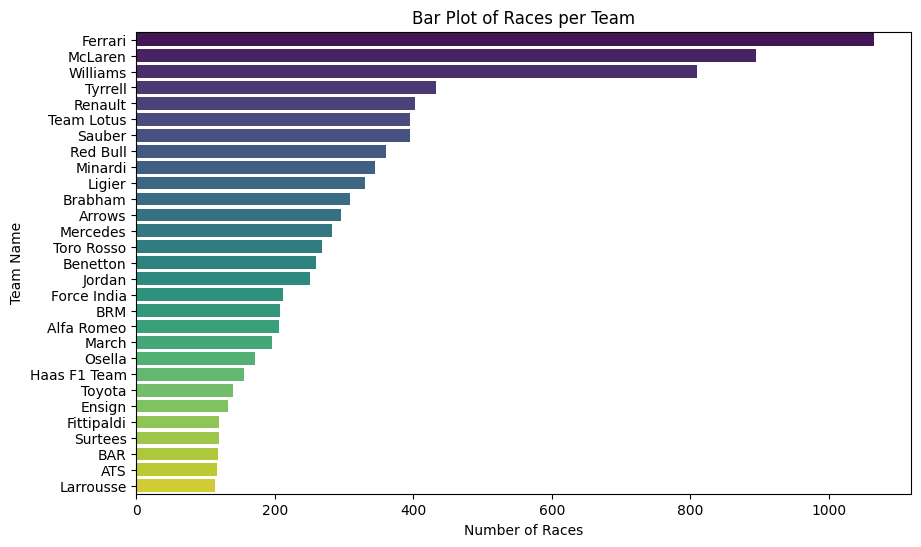

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='races', y='name', data=the_best_teams, palette='viridis')
plt.xlabel('Number of Races')
plt.ylabel('Team Name')
plt.title('Bar Plot of Races per Team')
plt.show()

Top 10 circuits (No.of times races happened)

In [ ]:
races.value_counts()
counts = races['name'].value_counts()
circuits_pop = pd.DataFrame({'circuitId': counts.index, 'number of times': counts.values})
circuits_pop

,circuitId,number of times
0,Italian Grand Prix,74
1,British Grand Prix,74
2,Monaco Grand Prix,69
3,Belgian Grand Prix,68
4,German Grand Prix,64
5,French Grand Prix,62
6,Spanish Grand Prix,53
7,Canadian Grand Prix,52
8,Brazilian Grand Prix,48
9,United States Grand Prix,44


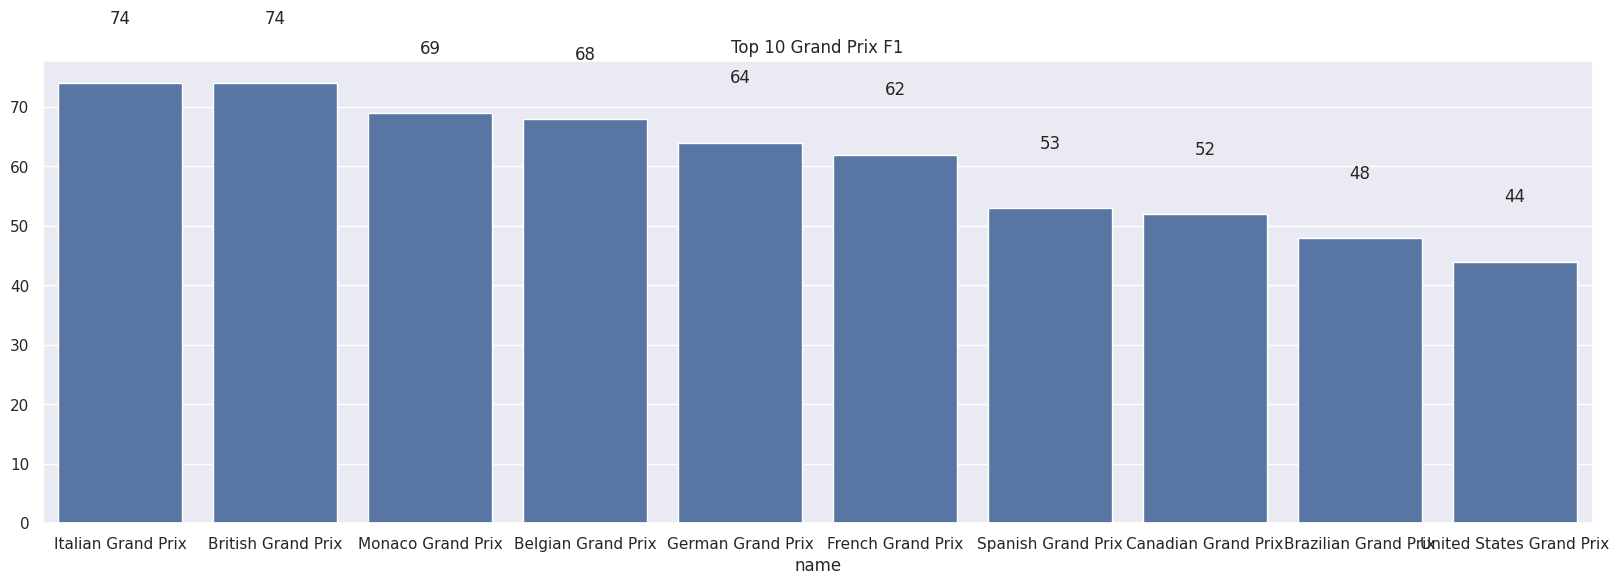

In [ ]:
top_10_circuits=races['name'].value_counts()[:10]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top_10_circuits.index, y=top_10_circuits.values)
ax.set_title("Top 10 Grand Prix F1")


for i, v in enumerate(top_10_circuits):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)


plt.show()

Visualizations:



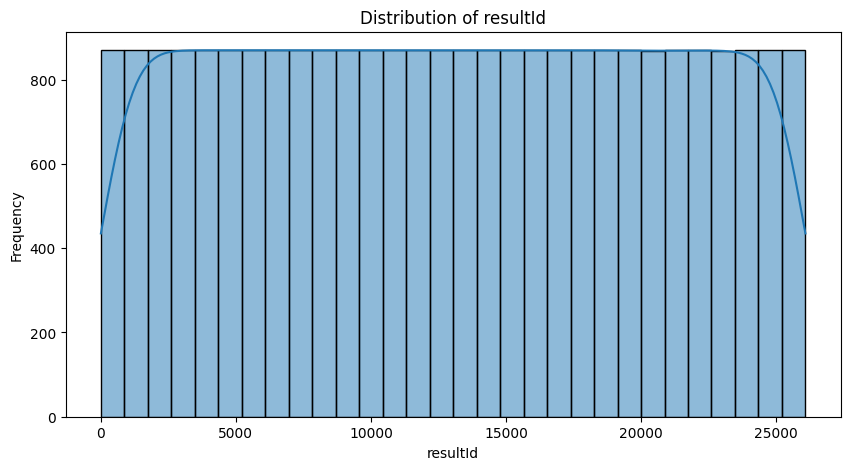

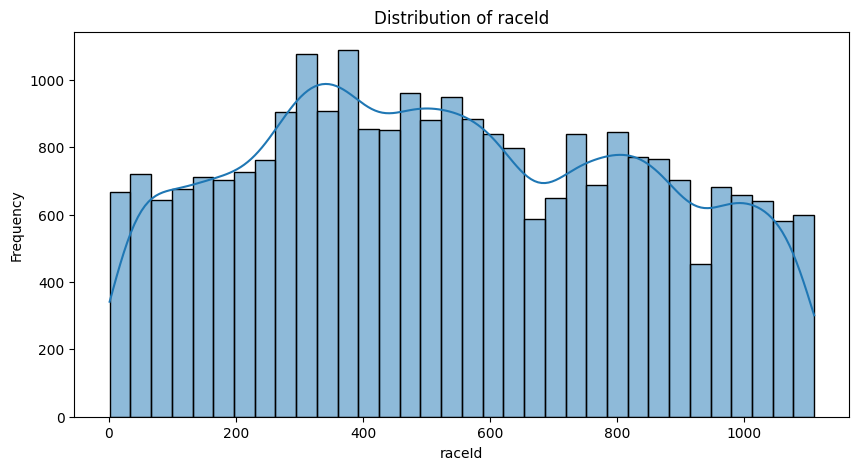

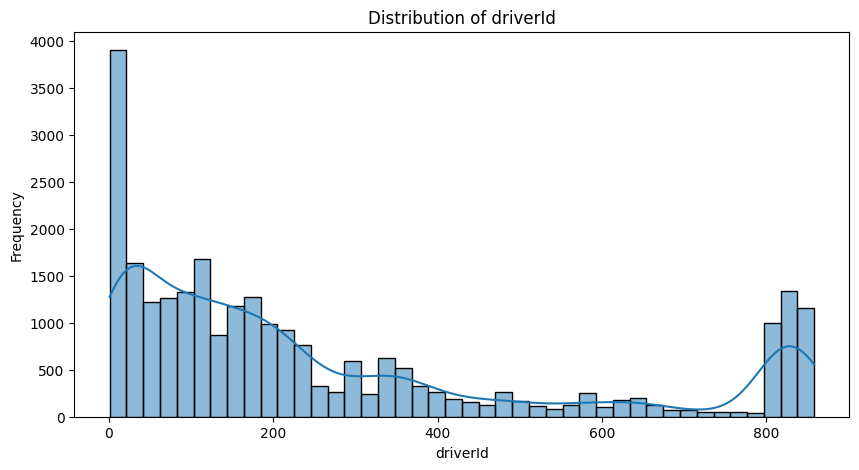

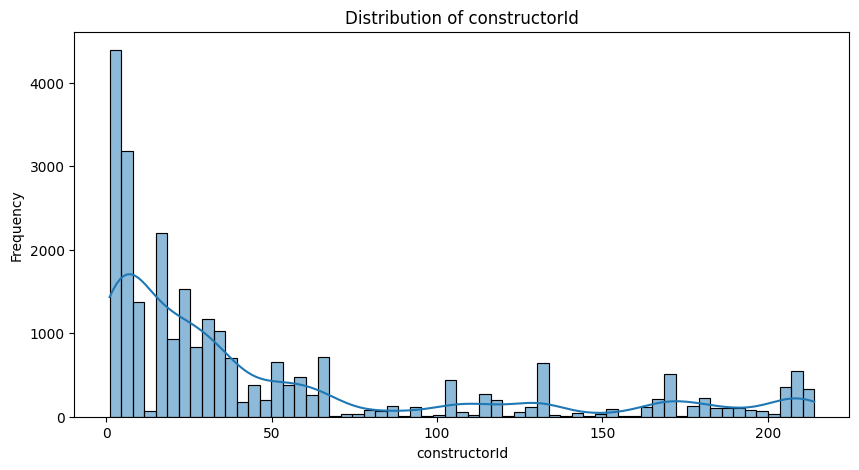

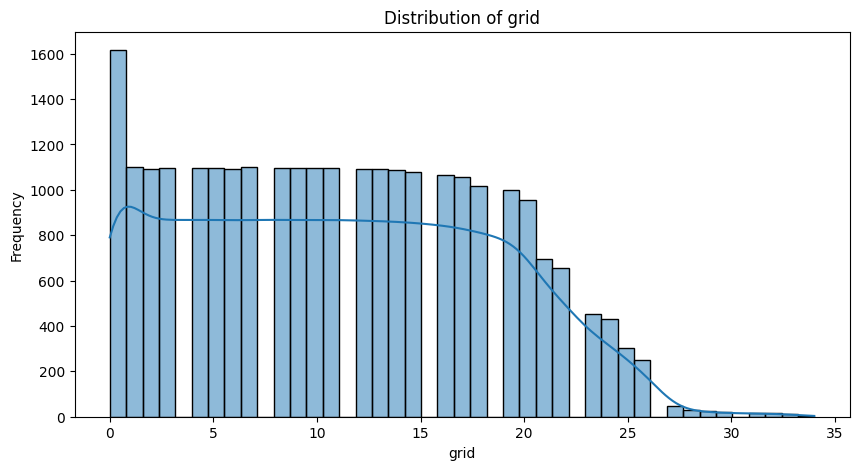

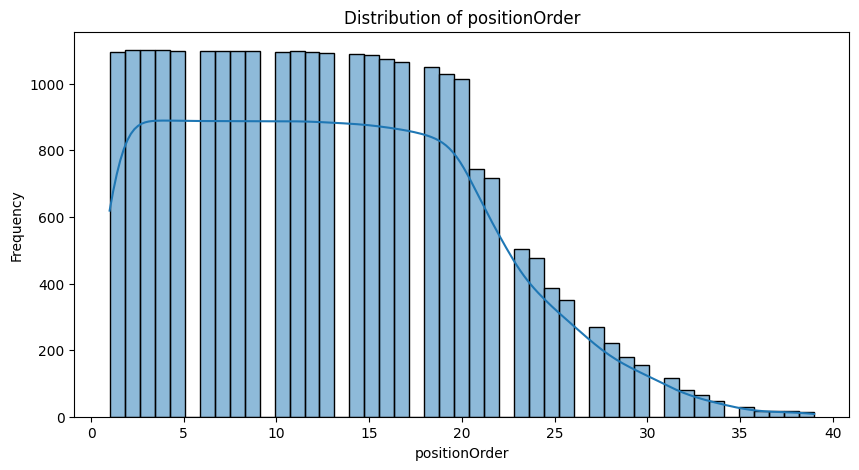

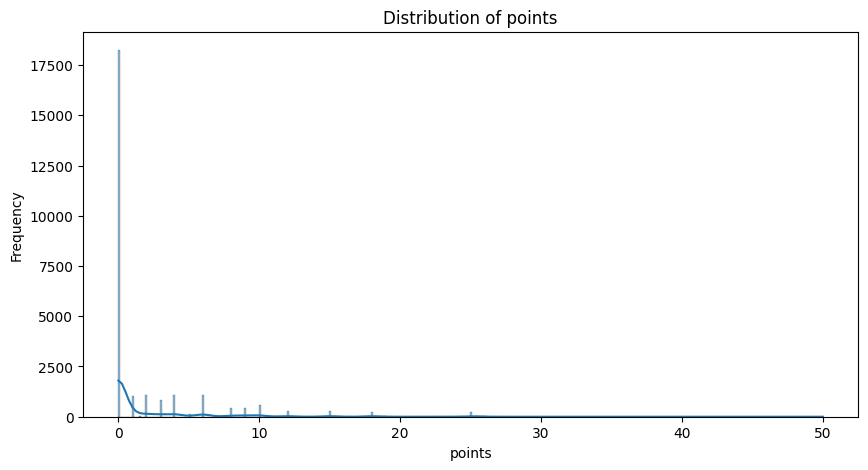

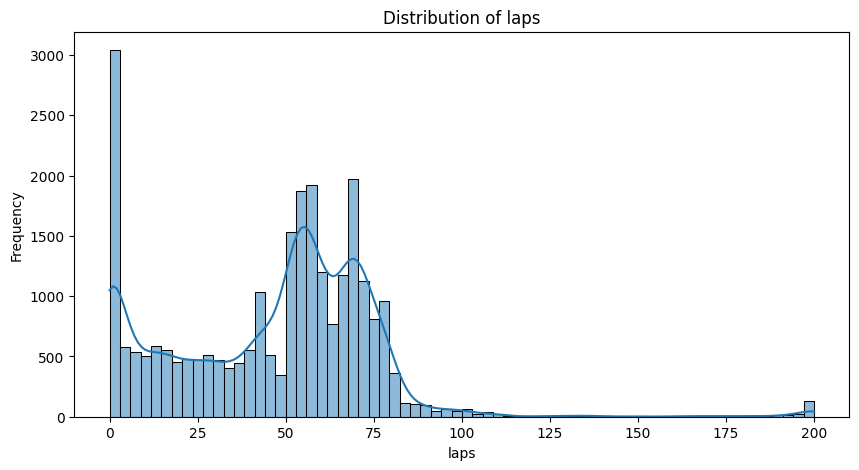

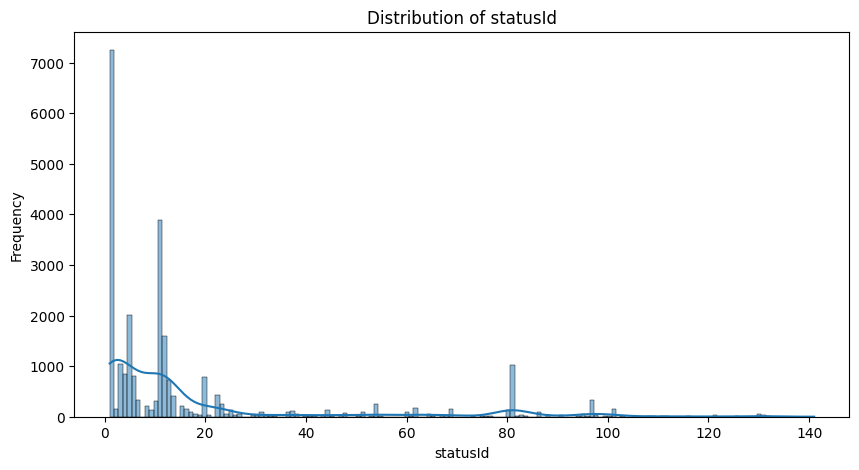

In [ ]:
print("Visualizations:\n")
# # Numerical features
num_columns = results.select_dtypes(include=['int64', 'float64']).columns
for col in num_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(results[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:

# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None,
                          misc_mpl_mods=False)

session = fastf1.get_session(2023, 'Bahrain', 'Q')
session.load()



req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.3.7]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Qualifying [v3.3.7]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_

In [ ]:
# First, we need to get an array of all drivers.

drivers = pd.unique(session.laps['Driver'])
print(drivers)


['VER' 'PER' 'LEC' 'SAI' 'ALO' 'RUS' 'HAM' 'STR' 'OCO' 'HUL' 'NOR' 'BOT'
 'ZHO' 'TSU' 'ALB' 'SAR' 'MAG' 'PIA' 'DEV' 'GAS']


In [ ]:
# After that we'll get each drivers fastest lap, create a new laps object
# from these laps, sort them by lap time and have pandas reindex them to
# number them nicely by starting position.

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)



In [ ]:
# The plot is nicer to look at and more easily understandable if we just plot
# the time differences. Therefore we subtract the fastest lap time from all
# other lap times.

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [ ]:
# We can take a quick look at the laps we have to check if everything
# looks all right. For this, we'll just check the 'Driver', 'LapTime'
# and 'LapTimeDelta' columns.

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])


   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:29.708000        0 days 00:00:00
1     PER 0 days 00:01:29.846000 0 days 00:00:00.138000
2     LEC        0 days 00:01:30 0 days 00:00:00.292000
3     SAI 0 days 00:01:30.154000 0 days 00:00:00.446000
4     ALO 0 days 00:01:30.336000 0 days 00:00:00.628000
5     RUS 0 days 00:01:30.340000 0 days 00:00:00.632000
6     HAM 0 days 00:01:30.384000 0 days 00:00:00.676000
7     HUL 0 days 00:01:30.809000 0 days 00:00:01.101000
8     STR 0 days 00:01:30.836000 0 days 00:00:01.128000
9     OCO 0 days 00:01:30.914000 0 days 00:00:01.206000
10    NOR 0 days 00:01:31.381000 0 days 00:00:01.673000
11    TSU 0 days 00:01:31.400000 0 days 00:00:01.692000
12    BOT 0 days 00:01:31.443000 0 days 00:00:01.735000
13    ALB 0 days 00:01:31.461000 0 days 00:00:01.753000
14    ZHO 0 days 00:01:31.473000 0 days 00:00:01.765000
15    SAR 0 days 00:01:31.652000 0 days 00:00:01.944000
16    MAG 0 days 00:01:31.892000 0 days 00:00:02

In [ ]:
# Finally, we'll create a list of team colors per lap to color our plot.
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)


KeyError: 

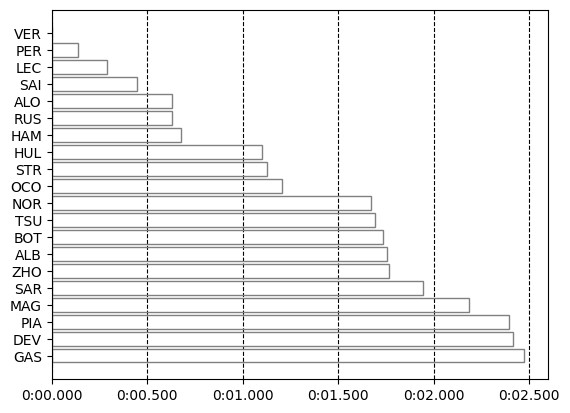

In [ ]:
# Now, we can plot all the data
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
# sphinx_gallery_defer_figures


In [26]:
lap_times, races

(        raceId  driverId  lap  position      time  milliseconds
 0          841        20    1         1  1:38.109         98109
 1          841        20    2         1  1:33.006         93006
 2          841        20    3         1  1:32.713         92713
 3          841        20    4         1  1:32.803         92803
 4          841        20    5         1  1:32.342         92342
 ...        ...       ...  ...       ...       ...           ...
 551737    1110       817   40        17  1:54.361        114361
 551738    1110       817   41        17  1:53.367        113367
 551739    1110       817   42        16  1:55.247        115247
 551740    1110       817   43        16  1:52.115        112115
 551741    1110       817   44        16  1:52.265        112265
 
 [551742 rows x 6 columns],
       raceId  year  round  circuitId                      name        date  \
 0          1  2009      1          1     Australian Grand Prix  2009-03-29   
 1          2  2009      2      

In [11]:
merged_data = pd.merge(races, driver_standings, on='raceId')
df_year_driver_pts = merged_data.groupby(['year', 'driverId']).sum()['points'].reset_index()
fig = px.line(df_year_driver_pts, x='year', y='points', color='driverId', title='Year-wise Driver Performance')
fig.update_layout(xaxis_title='Year', yaxis_title='Points')
fig.show()
#year wise performances